# Network

요즘 인터넷 서비스는 속도면에서는 데이터 프로젝트를 진행하기에 충분합니다. 개인 노트북으로 분석 프로젝트를 진행하는데는 큰 문제는 없습니다.

그리고 원격 접속 서비스앱을 이용한다면, 별다른 네트워크적 고려 없이 무선 공유기에 고성능 컴퓨터를 접속해 두고 외부 카페에서 가벼운 노트북이나 아이패드로 원격으로 작업을 할 수도 있습니다. 비슷한 기능을 제공하는 많은 서비스들이 있지만, 그 중 맥/윈도우간에 원격 접속 앱으로는 JumpDesktop 사용을 추천합니다. (맥용 앱은 유료입니다.) 사용방법은 인터넷 상에 많은 리뷰 글들이 있으니 참조하면 됩니다. (https://hauku.tistory.com/12)

이런, 시나리오 외에 웹으로 제공되는 서비스를 개발하는 프로젝트의 경우에는 네트워크 환경에 대해서 고려해야 할 것들이 좀 생겨납니다.

## Public IP / DDNS / SuperDMZ (TwinIP)

인터넷 서비스 네트워크 구성은 보통 아래와 같습니다.

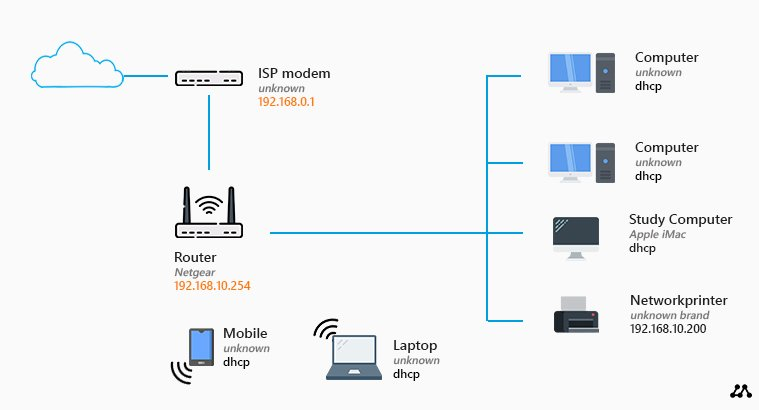
https://lazyadmin.nl/home-network/home-network-diagram/

컴퓨터 1,2,3 이 무선 공유기를 통해 인터넷은 자유롭게 사용할 수 있지만, 외부에서 컴퓨터 1,2,3 을 찾아 원격접속하기 위해서는 인터넷 상의 고유 주소인 Public IP 가 필요합니다.

하지만, 일반적으로 Public IP 는 부족하기 때문에 인터넷 공유기에 동적으로 할당되며, 공유기에 접속된 컴퓨터 1,2,3 은 무선 공유기 내에서만 고유한 Private IP를 가지게 됩니다.

웹 서비스를 컴퓨터 1에서 제공하기 위해서는 변경되는 Public IP로는 어렵습니다. 그래서 기억하기 쉽도록 DNS 와 동적 Public IP를 맵핑해주는 Dynamic Domain Name Service(DDNS)가 나오게 되었습니다. 그리고 무료 DDNS 서비스를 제공해주는 공유기 제품도 많으니 이를 이용하면 됩니다.

이제, 인터넷 상에서 DDNS를 통해 나의 무선 공유기를 잘 찾을 수 있게 되었으니, 인터넷으로 들어오는 요청을 컴퓨터 1에 전달해주는 기능이 필요합니다. 인터넷 공유기에서는 Port Forwading 또는 SuperDMZ (TwinIP) 기능을 통해 해당 컴퓨터로 요청을 전달 합니다. 

**참고**

인터넷 서비스는 통신 3사 모두 속도 면에서는 차이가 없지만, 네트워크를 구성하기 위해 제공되는 인터넷 모뎀(무선 공유기 아님)의 포트 갯수 및 IP 제공 방식은 확인해 볼 필요가 있습니다. 

인터넷 모뎀이 허브 방식이라면 인터넷 모뎀은 Public IP를 가지지 않고 모뎀의 포트 갯수 만큼 인터넷 신호를 나누어 주게 됩니다. 이 경우, 인터넷 모뎀의 포트에 여러개의 인테넛 공유기를 물리면 각각의 인터넷 공유기는 동적 Public IP를 가지게 됩니다. 인터넷으로 연결되는 독립된 네트워크가 생기는 것이죠 

```
인터넷 <--> 인터넷 모뎀 포트 1 <---> 무선 공유기 1 (서비스용 공유기) <--> 서버
                   포트 2 <---> 무선 공유기 2 (기본 제공 공유기) <--> 노트북
```

하나의 공유기내에 서비스를 제공하는 서버와 이를 사용하는 노트북이 같이 존재하게 되면, 서비스를 테스트할때 여러가지 애로 사항이 생기기 때문에 독립된 네트워크 상에서 개발/테스트를 진행하는 것이 좋습니다. 인터넷 통신사 선택시 이 점은 꼭 고려 대상에 넣어 볼만 합니다.

## Virtual Private Network (VPN)

만약 집에 여러대의 작업 컴퓨터가 있고, 원격으로 집에 있는 여러대의 작업 컴퓨터에 번갈아 가면서 접속해야 한다면 SuperDMZ 방식으로는 한계가 있습니다. 그리고 외부의 인터넷 환경의 경우 보안에 취약하기 때문에 공짜로 제공되는 공공 Wifi 의 경우에는 사용하면서도 꺼름직하죠. 

VPN을 사용한다면 이런 걱정에서 벗어날 수 있습니다. (여기서는 네트워크를 우회하기 위한 목적으로 사용하는 것이 아닙니다. VPN 본래의 취지에 맞게 사용하는 것이죠 ^^)

VPN 은 외부 네트워크에 접속된 컴퓨터와 내부 네트워크간에 가상의 안전한 통신 터널을 만들어서 외부 컴퓨터가 내부 컴퓨터틀과 안전하게 통신 할 수 있도록 해줍니다.

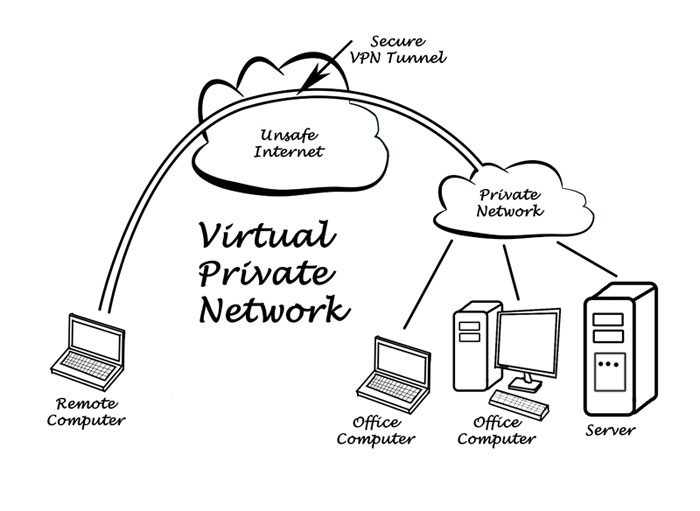
https://www.techsoup.org/support/articles-and-how-tos/everything-you-need-to-know-about-vpns

인터넷 공유기를 선택할 때는 이 VPN 기능이 기본 탑재되어 있는지도 구매시 고려 사항에 넣어 볼만 합니다. 

## Router

유무선 공유기: 
 * Synology 라우터 RT2600ac 유무선공유기
 * IPTIME 공유기

***작성중..***